# Forecast of packages delay on the basis of existing schedule and delay by Tecnimont on Amur GPP Project

Lets import all required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Read a CVS file that was prepared and cleaned in Excel

In [2]:
p3 = pd.read_csv('for_analysis1.csv', header=0, sep=';', decimal=',', engine='python')

In [3]:
p3.head(20)

,mark,pckg,disc,cat,subcat,rdi,qty,plan_afc,fact_afc,day,delay,rev,sheets
0,TH,4.1.1.29.502-TH,PROCESS,P&ID,Технологические схемы,TCM,0,15.04.2019,16.02.2020,503,307,4,5
1,TH,4.1.1.29.503-TH,PROCESS,P&ID,Технологические схемы,TCM,0,15.04.2019,16.02.2020,503,307,3,5
2,TM,0.0.0.00.000-TM6,PIPING,Specifications,Общий,TCM,0,15.01.2019,14.07.2020,413,546,6,2
3,TH,4.1.1.32.142-TH,PROCESS,P&ID,Технологические схемы,TCM,0,15.04.2019,16.02.2020,503,307,3,4
4,TH,4.2.1.05.301-TH,PROCESS,P&ID,Технологические схемы,TCM,0,15.04.2019,16.02.2020,503,307,3,23
5,TS,3.1.1.03.102-TS,PROCESS,P&ID,Технологические схемы,TCM,0,10.01.2019,26.02.2020,408,412,2,3
6,SS,4.1.1.20.718-SS,INSTRUMENTATION,Telecom Layouts,Связь,NIIK,709.5,09.10.2019,26.02.2020,680,140,0,6
7,PS,4.1.1.28.387-PS,INSTRUMENTATION,Instrumentation (Fire),Пожарная сигнализация,STI,1294.6,13.09.2019,26.02.2020,654,166,1,13
8,AK,4.1.1.33.131-AK,INSTRUMENTATION,Instrumentation - Field,КИП,STI,6233.5,13.10.2019,26.02.2020,684,136,2,20
9,PS,3.1.1.09.754-PS,INSTRUMENTATION,INSTRUMENTATION (FIRE),Пожарная сигнализация,NIIK,473,04.08.2019,26.02.2020,614,206,1,7


Lets look into the dataset first

In [9]:
p3.describe()

,qty,delay,rev,sheets
count,7058.000000,7236.000000,7236.000000,7236.000000
mean,1949.683593,108.645384,0.801133,8.793256
std,9439.189350,134.274146,1.013580,16.485762
min,0.000000,-244.000000,0.000000,1.000000
25%,1.545000,0.000000,0.000000,3.000000
50%,61.395000,55.000000,1.000000,5.000000
75%,630.502500,192.000000,1.000000,9.000000
max,290900.000000,868.000000,9.000000,497.000000


day          AxesSubplot(0.125,0.536818;0.352273x0.343182)
delay     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
rev             AxesSubplot(0.125,0.125;0.352273x0.343182)
sheets       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

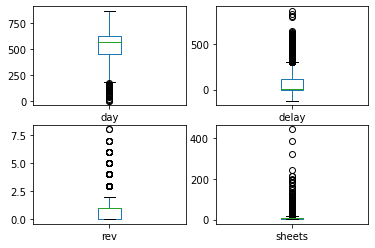

In [6]:
p3.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0AD520>]],
      dtype=object)

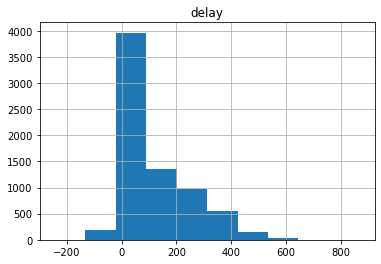

In [11]:
p3.hist('delay')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC73220>,
      dtype=object)

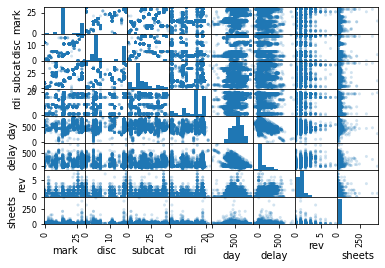

In [17]:
pd.plotting.scatter_matrix(p3, alpha=0.2)

Process a DataFrame, remove NAs and uninformative columns

In [4]:
p3.drop(['plan_afc','fact_afc', 'pckg', 'qty', 'cat'], axis=1, inplace=True)
p3.dropna(inplace = True)
p3.isna().sum()

mark      0
disc      0
subcat    0
rdi       0
day       0
delay     0
rev       0
sheets    0
dtype: int64

In [7]:
for column in p3.columns.values:
    print(column)
    if p3[column].dtype != np.int64 and p3[column].dtype != np.float64:
        enc = LabelEncoder()
        enc.fit(p3[column].astype(str))
        p3[column] = enc.transform(p3[column])

mark
disc
subcat
rdi
day
delay
rev
sheets


Split dataframe in Train and Test pieces

In [8]:
X_train, X_test, y_train, y_test = train_test_split(p3.iloc[:, p3.columns != 'delay'], p3['delay'], test_size=0.25)

In [5]:
p3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10363 entries, 0 to 10453
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mark    10363 non-null  object
 1   disc    10363 non-null  object
 2   subcat  10363 non-null  object
 3   rdi     10363 non-null  object
 4   day     10363 non-null  int64 
 5   delay   10363 non-null  int64 
 6   rev     10363 non-null  int64 
 7   sheets  10363 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 728.6+ KB


Lets train linear model first

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
sqrt(mean_squared_error(lm.predict(X_train), y_train))

91.37495604962918

In [11]:
sqrt(mean_squared_error(lm.predict(X_test), y_test))

86.69354077597986

Text(0, 0.5, 'Estimated quality')

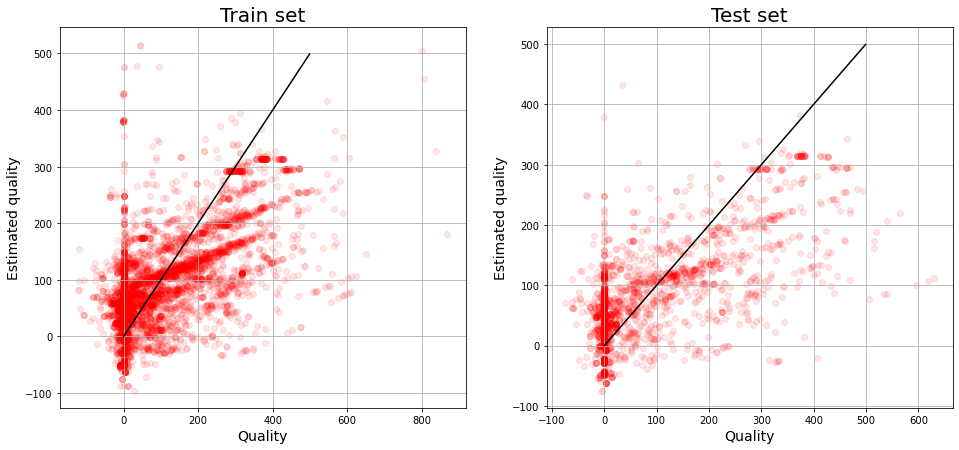

In [13]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)

plot(range(500), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)

plot(range(500), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

Lets try a bunch of different methods.

In [69]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [70]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [87]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Temp\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


LR: 0.218688 (0.004232)


C:\Temp\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


LDA: 0.210989 (0.004455)


C:\Temp\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


KNN: 0.206091 (0.008584)


C:\Temp\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


CART: 0.225505 (0.004669)


C:\Temp\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


NB: 0.026596 (0.011773)


C:\Temp\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


SVM: 0.248076 (0.006454)


Lets try Random Forest

In [14]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)

In [15]:
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3)

In [18]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

36.12056430523194

In [19]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

47.11160785760122

Text(0, 0.5, 'Estimated quality')

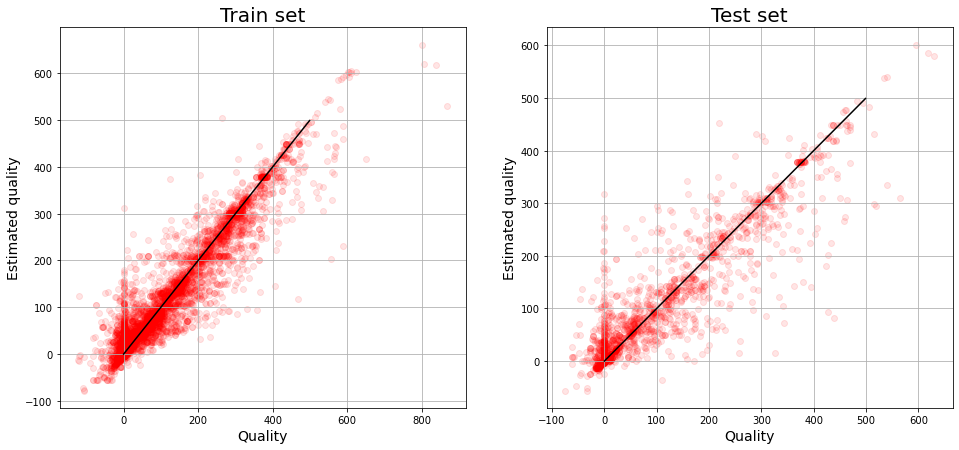

In [21]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)

plot(range(500), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)


plot(range(500), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

In [22]:
rf.score(X_test, y_test)

0.8449078068863112

In [23]:
importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
5,rev,0.399465
4,day,0.210636
2,subcat,0.147645
1,disc,0.082218
3,rdi,0.060787
0,mark,0.057977
6,sheets,0.041272


We can see that most of the value is given to model by revision number, which is natural as each revision takes time to be issued.
More methods need to be applied to the model to explore the possibility to forecast delay on the basis of package discipline and design institute.